<a href="https://colab.research.google.com/github/chipojaya1/Machine-Learning-I/blob/main/Practical%20Assignment%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DNSC6314 Assignment 1 by Chipo Jaya: G44454879**

# Feature Information: Bike Data
- This assignment uses Capital Bikeshare data from
https://ride.capitalbikeshare.com/system-data

- Data is from three months: 2024/02, 2024/03 and 2024/04.

### Getting started

In [1]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# cloning github repository to access data
!git clone https://github.com/chipojaya1/Machine-Learning-I.git

Cloning into 'Machine-Learning-I'...
remote: Enumerating objects: 32, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 32 (delta 6), reused 0 (delta 0), pack-reused 20 (from 2)
Receiving objects: 100% (32/32), 47.94 MiB | 18.35 MiB/s, done.
Resolving deltas: 100% (11/11), done.
Updating files: 100% (5/5), done.


In [74]:
# load necessary libraries
import pandas as pd                         # for data manipulation and cleaning
import numpy as np                          # for numerical operations
import matplotlib.pyplot as plt             # for visualizing data
import seaborn as sns                       # for visualizing data

# for feature engineering i.e scaling, encoding, and feature selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [75]:
sns.set(style='whitegrid')     # Set visual style for seaborn

### Data loading

In [76]:
# load the data
df_Feb = pd.read_csv('/content/Machine-Learning-I/202402-capitalbikeshare-tripdata.csv')
df_Mar = pd.read_csv('/content/Machine-Learning-I/202403-capitalbikeshare-tripdata.csv')
df_Apr = pd.read_csv('/content/Machine-Learning-I/202404-capitalbikeshare-tripdata.csv')

# data merge
df_bike=pd.concat([df_Feb, df_Mar,df_Apr])

In [77]:
# getting to know the data
print(f"Bike data shape: {df_bike.shape}")
print()

df_bike.info()
print()

df_bike.head()

Bike data shape: (1245899, 13)

<class 'pandas.core.frame.DataFrame'>
Index: 1245899 entries, 0 to 490264
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   ride_id             1245899 non-null  object 
 1   rideable_type       1245899 non-null  object 
 2   started_at          1245899 non-null  object 
 3   ended_at            1245899 non-null  object 
 4   start_station_name  1061748 non-null  object 
 5   start_station_id    1061748 non-null  float64
 6   end_station_name    1052421 non-null  object 
 7   end_station_id      1052253 non-null  float64
 8   start_lat           1245899 non-null  float64
 9   start_lng           1245899 non-null  float64
 10  end_lat             1244884 non-null  float64
 11  end_lng             1244884 non-null  float64
 12  member_casual       1245899 non-null  object 
dtypes: float64(6), object(7)
memory usage: 133.1+ MB



,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,24DBACC298E33BF6,electric_bike,2024-02-01 21:18:50,2024-02-01 21:27:36,Eckington Pl & Q St NE,31505.0,5th & K St NW,31600.0,38.910893,-77.005023,38.90304,-77.019027,member
1,FE1067800A18BC56,electric_bike,2024-02-06 17:15:33,2024-02-06 17:30:33,4th & C St SW,31243.0,NaN,NaN,38.886443,-77.017388,38.91000,-76.980000,member
2,AD1962B215B5879D,electric_bike,2024-02-26 13:19:42,2024-02-26 13:30:44,North Capitol St & F St NW,31624.0,NaN,NaN,38.896907,-77.009684,38.90000,-77.010000,member
3,3F8352E6D9EC4F85,electric_bike,2024-02-02 11:01:22,2024-02-02 11:05:14,1st & K St NE,31662.0,NaN,NaN,38.902394,-77.005614,38.90000,-77.010000,member
4,D656DA87FA915F14,electric_bike,2024-02-25 08:28:18,2024-02-25 08:48:44,Virginia Ave & 25th St NW,31297.0,NaN,NaN,38.898456,-77.053075,38.91000,-77.060000,member


In [78]:
# summary statistics
df_bike.describe()

,start_station_id,end_station_id,start_lat,start_lng,end_lat,end_lng
count,1.061748e+06,1.052253e+06,1.245899e+06,1.245899e+06,1.244884e+06,1.244884e+06
mean,3.137283e+04,3.137400e+04,3.890519e+01,-7.703166e+01,3.890429e+01,-7.703143e+01
std,2.811956e+02,2.835728e+02,2.664090e-02,3.530010e-02,3.597265e-02,3.998588e-02
min,3.020000e+04,3.020000e+04,3.875000e+01,-7.740000e+01,1.180000e+01,-7.756000e+01
25%,3.120900e+04,3.121200e+04,3.889303e+01,-7.704339e+01,3.889227e+01,-7.704368e+01
50%,3.128200e+04,3.128200e+04,3.890499e+01,-7.703000e+01,3.890365e+01,-7.703000e+01
75%,3.160800e+04,3.161000e+04,3.891776e+01,-7.701219e+01,3.891560e+01,-7.701199e+01
max,3.320000e+04,3.320000e+04,3.913000e+01,-7.682000e+01,3.913000e+01,-5.585000e+01


### Data cleaning

This research will be focusing on the GWSB Station: '22nd & H St NW'

**Bike Availability: Number of Pickups**

In [79]:
# inspecting the started_at column
df_bike['started_at'].head(10)

,started_at
0,2024-02-01 21:18:50
1,2024-02-06 17:15:33
2,2024-02-26 13:19:42
3,2024-02-02 11:01:22
4,2024-02-25 08:28:18
5,2024-02-24 16:12:24
6,2024-02-23 19:12:38
7,2024-02-15 08:58:20
8,2024-02-29 14:39:10
9,2024-02-08 08:12:24


In [80]:
# converting the 'started_at' column to datetime objects
df_bike['started_at_date'] = pd.to_datetime(df_bike['started_at']).dt.date
df_bike['started_at_date'].head()

,started_at_date
0,2024-02-01
1,2024-02-06
2,2024-02-26
3,2024-02-02
4,2024-02-25


In [81]:
# inspecting start_station_name column
df_bike['start_station_name'].head()

,start_station_name
0,Eckington Pl & Q St NE
1,4th & C St SW
2,North Capitol St & F St NW
3,1st & K St NE
4,Virginia Ave & 25th St NW


In [82]:
# filtering trips starting from location '22nd & H St NW'
PU_trips = df_bike[df_bike['start_station_name'] == '22nd & H St NW']

In [83]:
# grouping by date and counting the trips on that date
PU_counts = PU_trips.groupby('started_at_date')['started_at_date'].count()

PU_counts

,started_at_date
started_at_date,
2024-02-01,33
2024-02-02,23
2024-02-03,22
2024-02-04,18
2024-02-05,19
...,...
2024-04-26,33
2024-04-27,18
2024-04-28,36


**Dock Availability: Number of Dropoffs**

In [84]:
# inspecting drop ended_at column
df_bike['ended_at'].head()

,ended_at
0,2024-02-01 21:27:36
1,2024-02-06 17:30:33
2,2024-02-26 13:30:44
3,2024-02-02 11:05:14
4,2024-02-25 08:48:44


In [85]:
# convertin the 'ended_at' column to datetime objects
df_bike['ended_at_date'] = pd.to_datetime(df_bike['ended_at']).dt.date
df_bike['ended_at_date'].head(10)

,ended_at_date
0,2024-02-01
1,2024-02-06
2,2024-02-26
3,2024-02-02
4,2024-02-25
5,2024-02-24
6,2024-02-23
7,2024-02-15
8,2024-02-29
9,2024-02-08


In [86]:
# inspecting the end_station_name column
df_bike['end_station_name'].head()

,end_station_name
0,5th & K St NW
1,NaN
2,NaN
3,NaN
4,NaN


In [87]:
# filtering trips ending at destination '22nd & H St NW'
DO_trips = df_bike[df_bike['end_station_name'] == '22nd & H St NW']
DO_trips.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,started_at_date,ended_at_date
1398,3E6F60E28CD53F29,classic_bike,2024-02-17 16:08:24,2024-02-17 16:13:41,17th & G St NW,31277.0,22nd & H St NW,31127.0,38.898301,-77.039643,38.898925,-77.048852,member,2024-02-17,2024-02-17
1403,F1B9FCA75E7A4ED8,classic_bike,2024-02-17 00:29:17,2024-02-17 00:41:14,7th & F St NW / National Portrait Gallery,31232.0,22nd & H St NW,31127.0,38.897283,-77.022191,38.898925,-77.048852,member,2024-02-17,2024-02-17
1409,9324D853D41E09CC,electric_bike,2024-02-02 13:33:24,2024-02-02 13:46:29,37th & O St NW / Georgetown University,31236.0,22nd & H St NW,31127.0,38.907937,-77.071677,38.898925,-77.048852,casual,2024-02-02,2024-02-02
1418,D41D95AE5813E767,classic_bike,2024-02-02 09:03:42,2024-02-02 09:40:01,Eads St & 15th St S,31000.0,22nd & H St NW,31127.0,38.859751,-77.053235,38.898925,-77.048852,member,2024-02-02,2024-02-02
1431,0A0795A6A8EF463E,classic_bike,2024-02-08 13:46:46,2024-02-08 14:05:46,Wilson Blvd & N Edgewood St,31019.0,22nd & H St NW,31127.0,38.889396,-77.091862,38.898925,-77.048852,member,2024-02-08,2024-02-08


In [88]:
# grouping by date and count the number of trips
DO_counts = DO_trips.groupby('ended_at_date')['ended_at_date'].count()

DO_counts

,ended_at_date
ended_at_date,
2024-02-01,33
2024-02-02,25
2024-02-03,20
2024-02-04,19
2024-02-05,23
...,...
2024-04-26,39
2024-04-27,24
2024-04-28,28


**Merging Pick Up and Drop Off tables**
- For each day, we look at the numbers of pickups and dropoffs

In [89]:
# merge PU_counts and DO_counts by matching the dates, and change the column names to PU_count and DO_count respectively.
PU_DO_counts = pd.merge(PU_counts, DO_counts, left_index=True, right_index=True, how='outer')
PU_DO_counts = PU_DO_counts.rename(columns={'started_at_date': 'PU_ct', 'ended_at_date': 'DO_ct'})

# change the index name from 'started_at' to 'date'
PU_DO_counts = PU_DO_counts.rename_axis('date')
PU_DO_counts


,PU_ct,DO_ct
date,,
2024-02-01,33,33
2024-02-02,23,25
2024-02-03,22,20
2024-02-04,18,19
2024-02-05,19,23
...,...,...
2024-04-26,33,39
2024-04-27,18,24
2024-04-28,36,28


### Data visualization

- Visualizing the pickups and dropoffs

In [90]:
# Convert PU_DO_counts to long format
PU_DO_long = pd.melt(PU_DO_counts.reset_index(), id_vars=['date'],
                     value_vars=['PU_ct', 'DO_ct'],
                     var_name='Type', value_name='Count')

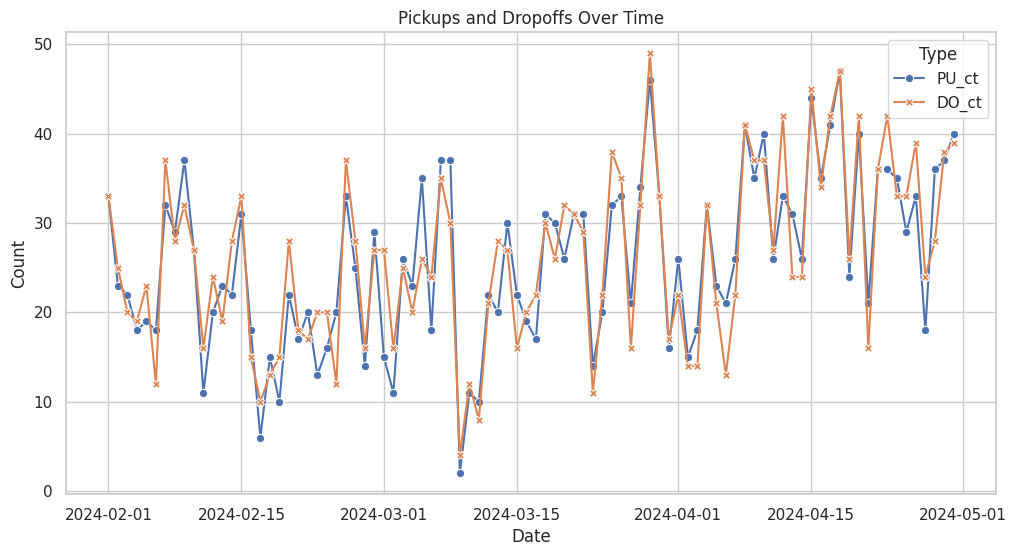

In [91]:
# plotting pick up and drop off counts
plt.figure(figsize=(12, 6))
sns.lineplot(data=PU_DO_long, x='date', y='Count', hue='Type', style='Type',
             markers=True, dashes=False)

# customizing the chart
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Pickups and Dropoffs Over Time')
plt.legend(title='Type')
plt.grid(True)
plt.show()

# Feature Information: Weather Data
- This assignment also uses weather data from https://www.visualcrossing.com/weather-history/

### Data loading

In [92]:
# Loading the weather data
df_weather = pd.read_csv('/content/Machine-Learning-I/DC_weather_2024.csv')

In [93]:
# getting to know the data
print(f"weather data shape: {df_weather.shape}")
print()

df_weather.info()
print()

df_weather.head()

weather data shape: (366, 33)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              366 non-null    object 
 1   datetime          366 non-null    object 
 2   tempmax           366 non-null    float64
 3   tempmin           366 non-null    float64
 4   temp              366 non-null    float64
 5   feelslikemax      366 non-null    float64
 6   feelslikemin      366 non-null    float64
 7   feelslike         366 non-null    float64
 8   dew               366 non-null    float64
 9   humidity          366 non-null    float64
 10  precip            366 non-null    float64
 11  precipprob        366 non-null    int64  
 12  precipcover       366 non-null    float64
 13  preciptype        134 non-null    object 
 14  snow              366 non-null    float64
 15  snowdepth         366 non-null    float64
 16  windgust     

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,"washington, dc",2024-01-01,43.0,38.9,40.8,41.8,31.4,36.4,33.3,74.7,...,0.9,1,10,2024-01-01T07:26:50,2024-01-01T16:56:30,0.68,Overcast,Cloudy skies throughout the day.,cloudy,"KDCA,72405013743,D6279,72403793728,KADW,KDAA,7..."
1,"washington, dc",2024-01-02,45.9,35.7,40.4,40.9,27.2,33.8,26.2,57.3,...,8.3,5,10,2024-01-02T07:26:58,2024-01-02T16:57:20,0.72,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"KDCA,72405013743,D6279,72403793728,KADW,KDAA,7..."
2,"washington, dc",2024-01-03,47.8,33.7,39.9,44.6,27.8,36.4,26.6,59.5,...,9.6,5,10,2024-01-03T07:27:04,2024-01-03T16:58:10,0.75,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"C6294,KDCA,72405013743,D6279,72403793728,KADW,..."
3,"washington, dc",2024-01-04,46.7,33.2,40.4,41.9,24.1,34.6,25.2,55.2,...,4.8,4,10,2024-01-04T07:27:07,2024-01-04T16:59:02,0.78,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"C6294,KDCA,72405013743,72403793728,KADW,KDAA,7..."
4,"washington, dc",2024-01-05,39.9,27.8,33.6,35.8,19.4,28.0,18.9,55.0,...,11.6,5,10,2024-01-05T07:27:09,2024-01-05T16:59:55,0.81,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"C6294,KDCA,72405013743,72403793728,D6279,KADW,..."


In [94]:
# summary statistics
df_weather.describe()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,moonphase
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,...,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.00000,366.000000,366.000000,366.000000
mean,69.432514,53.746721,61.242623,69.637158,51.471038,60.299727,47.084426,62.434973,0.090183,36.338798,...,14.503005,194.506284,1016.946448,63.996995,9.521038,132.919945,11.47459,6.002732,13.142077,0.486667
std,16.995089,15.770360,15.996778,19.233284,18.641782,18.544548,17.092059,13.624988,0.252289,48.163363,...,4.792267,100.211027,7.204396,25.299490,0.916736,68.526963,5.93407,2.723312,8.089671,0.292243
min,28.900000,15.800000,23.000000,19.800000,6.100000,12.900000,4.300000,32.600000,0.000000,0.000000,...,5.500000,1.000000,997.700000,2.100000,3.200000,5.300000,0.40000,0.000000,10.000000,0.000000
25%,55.000000,40.900000,47.925000,55.000000,35.875000,45.875000,34.025000,52.625000,0.000000,0.000000,...,11.000000,118.475000,1012.800000,45.225000,9.700000,78.425000,6.80000,4.000000,10.000000,0.250000
50%,71.850000,53.450000,63.550000,71.850000,53.450000,63.500000,48.100000,61.850000,0.000000,0.000000,...,13.650000,186.500000,1016.400000,68.300000,9.900000,136.050000,11.70000,6.000000,10.000000,0.500000
75%,83.075000,67.800000,75.275000,83.875000,67.800000,75.450000,61.275000,71.975000,0.032000,100.000000,...,16.975000,295.900000,1020.900000,84.775000,9.900000,189.750000,16.40000,8.000000,10.000000,0.750000
max,102.700000,81.600000,90.800000,110.000000,87.800000,97.400000,75.400000,91.700000,2.278000,100.000000,...,31.600000,357.600000,1044.900000,100.000000,9.900000,331.200000,28.70000,10.000000,60.000000,0.980000


### Data cleaning

In [95]:
# dropping unnecessary variables
df_weather=df_weather.drop(columns=['name', 'stations','description','sunrise','sunset','conditions','severerisk','preciptype','windgust'])

**Prepare X and y: Merge df_weather with PU_DO_counts**

In [96]:
# inspecting the started_at column
df_weather['datetime'].head()

,datetime
0,2024-01-01
1,2024-01-02
2,2024-01-03
3,2024-01-04
4,2024-01-05


In [97]:
# converting the 'datetime' column to datetime objects and extract the date
df_weather['datetime'] = pd.to_datetime(df_weather['datetime'])
df_weather['date'] = df_weather['datetime'].dt.date
df_weather['date'].head()

,date
0,2024-01-01
1,2024-01-02
2,2024-01-03
3,2024-01-04
4,2024-01-05


In [98]:
PU_DO_counts.head()

,PU_ct,DO_ct
date,,
2024-02-01,33,33
2024-02-02,23,25
2024-02-03,22,20
2024-02-04,18,19
2024-02-05,19,23


In [99]:
# Merge the two dataframes based on the 'date' column
merged_df = pd.merge(PU_DO_counts, df_weather, on='date', how='left')

# Display the merged dataframe
merged_df

,date,PU_ct,DO_ct,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,...,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,moonphase,icon
0,2024-02-01,33,33,2024-02-01,53.0,31.7,42.4,53.0,26.4,39.3,...,12.0,190.8,1016.3,43.3,8.4,136.8,11.8,5,0.73,partly-cloudy-day
1,2024-02-02,23,25,2024-02-02,51.8,44.0,47.1,51.8,36.6,44.4,...,19.1,354.3,1012.8,97.3,9.8,51.7,4.4,2,0.75,rain
2,2024-02-03,22,20,2024-02-03,51.0,35.8,42.2,51.0,28.0,37.6,...,14.7,354.9,1018.2,11.0,9.9,143.9,12.5,6,0.79,clear-day
3,2024-02-04,18,19,2024-02-04,51.2,32.7,41.7,51.2,27.4,40.7,...,9.2,87.4,1016.0,9.0,9.9,147.4,12.8,6,0.83,clear-day
4,2024-02-05,19,23,2024-02-05,51.8,32.5,41.0,51.8,26.0,37.8,...,12.2,34.9,1013.8,21.4,9.9,145.3,12.7,6,0.86,partly-cloudy-day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,2024-04-26,33,39,2024-04-26,64.9,45.5,55.2,64.9,41.5,54.2,...,15.4,116.4,1029.5,69.1,9.9,215.0,18.5,9,0.59,partly-cloudy-day
86,2024-04-27,18,24,2024-04-27,60.1,51.9,55.7,60.1,51.9,55.7,...,10.0,149.9,1030.1,97.3,9.7,44.0,3.9,2,0.63,rain
87,2024-04-28,36,28,2024-04-28,83.1,55.8,67.0,83.3,55.8,67.1,...,10.0,170.0,1021.3,62.1,9.8,213.6,18.5,9,0.67,partly-cloudy-day
88,2024-04-29,37,38,2024-04-29,88.3,62.7,75.2,88.9,62.7,75.3,...,13.0,177.3,1015.6,35.8,9.9,204.5,17.8,9,0.70,partly-cloudy-day


In [100]:
# summary statistcs
merged_df.describe()

,PU_ct,DO_ct,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,...,snowdepth,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,moonphase
count,90.000000,90.000000,90,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,...,90.0,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,25.788889,26.088889,2024-03-16 12:00:00,60.521111,43.918889,51.795556,59.943333,39.918889,49.730000,36.365556,...,0.0,15.921111,191.537778,1015.570000,64.491111,9.527778,132.308889,11.416667,5.855556,0.484889
min,2.000000,4.000000,2024-02-01 00:00:00,40.900000,26.500000,36.300000,38.800000,20.000000,28.300000,13.000000,...,0.0,6.500000,2.900000,997.700000,4.100000,4.700000,15.400000,1.400000,1.000000,0.000000
25%,18.250000,19.000000,2024-02-23 06:00:00,51.825000,36.150000,44.300000,51.825000,29.975000,40.825000,26.400000,...,0.0,12.200000,102.025000,1011.675000,43.775000,9.725000,76.500000,6.650000,4.000000,0.250000
50%,26.000000,26.000000,2024-03-16 12:00:00,56.900000,43.300000,51.450000,56.900000,38.300000,50.100000,36.500000,...,0.0,14.850000,180.200000,1014.700000,71.800000,9.900000,140.350000,12.150000,6.000000,0.490000
75%,33.000000,33.000000,2024-04-07 18:00:00,67.875000,49.400000,57.400000,67.875000,47.850000,56.925000,45.200000,...,0.0,18.700000,297.950000,1020.200000,85.675000,9.900000,186.150000,16.075000,8.000000,0.737500
max,47.000000,49.000000,2024-04-30 00:00:00,88.300000,65.000000,75.200000,88.900000,65.000000,75.300000,60.900000,...,0.0,29.100000,354.900000,1033.900000,100.000000,9.900000,272.800000,23.500000,10.000000,0.980000
std,9.575829,9.768839,NaN,10.604308,9.227741,9.226950,11.367972,11.812362,10.996521,11.561911,...,0.0,5.281162,106.317877,7.389355,26.773396,0.865315,65.098531,5.613792,2.501959,0.289507


### Data visualization

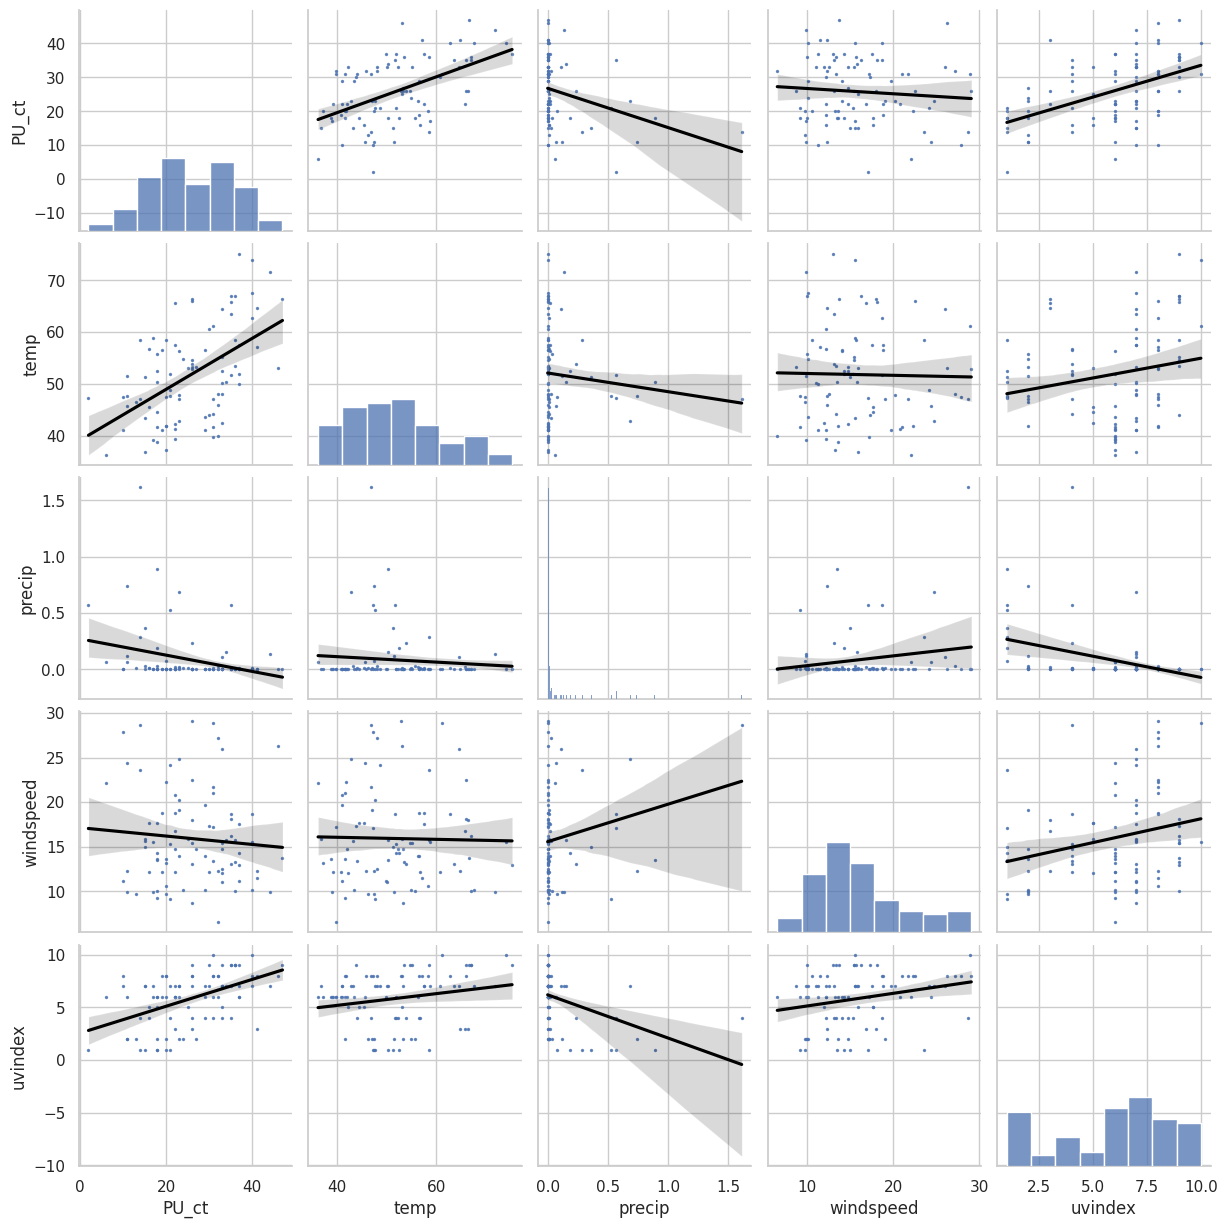

In [101]:
# pairplot for pickup counts
sns.pairplot(merged_df[['PU_ct',"temp", "precip", "windspeed","uvindex"]], kind="reg",plot_kws=dict(scatter_kws=dict(s=2), line_kws = {'color':'black'}))

# Training and testing models

**There are two target variables: PU_ct and DO_ct**

In [102]:
# Cleaned data info
print(f"my data shape: {merged_df.shape}")
print()

merged_df.info()
print()

merged_df.head()


my data shape: (90, 27)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              90 non-null     object        
 1   PU_ct             90 non-null     int64         
 2   DO_ct             90 non-null     int64         
 3   datetime          90 non-null     datetime64[ns]
 4   tempmax           90 non-null     float64       
 5   tempmin           90 non-null     float64       
 6   temp              90 non-null     float64       
 7   feelslikemax      90 non-null     float64       
 8   feelslikemin      90 non-null     float64       
 9   feelslike         90 non-null     float64       
 10  dew               90 non-null     float64       
 11  humidity          90 non-null     float64       
 12  precip            90 non-null     float64       
 13  precipprob        90 non-null     int64         
 14  pre

,date,PU_ct,DO_ct,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,...,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,moonphase,icon
0,2024-02-01,33,33,2024-02-01,53.0,31.7,42.4,53.0,26.4,39.3,...,12.0,190.8,1016.3,43.3,8.4,136.8,11.8,5,0.73,partly-cloudy-day
1,2024-02-02,23,25,2024-02-02,51.8,44.0,47.1,51.8,36.6,44.4,...,19.1,354.3,1012.8,97.3,9.8,51.7,4.4,2,0.75,rain
2,2024-02-03,22,20,2024-02-03,51.0,35.8,42.2,51.0,28.0,37.6,...,14.7,354.9,1018.2,11.0,9.9,143.9,12.5,6,0.79,clear-day
3,2024-02-04,18,19,2024-02-04,51.2,32.7,41.7,51.2,27.4,40.7,...,9.2,87.4,1016.0,9.0,9.9,147.4,12.8,6,0.83,clear-day
4,2024-02-05,19,23,2024-02-05,51.8,32.5,41.0,51.8,26.0,37.8,...,12.2,34.9,1013.8,21.4,9.9,145.3,12.7,6,0.86,partly-cloudy-day


In [135]:
# Preparing the target variables and features for modelling
y = merged_df[['PU_ct','DO_ct']]
X = merged_df[['temp','precip','windspeed','uvindex','icon']]
X

,temp,precip,windspeed,uvindex,icon
0,42.4,0.000,12.0,5,partly-cloudy-day
1,47.1,0.012,19.1,2,rain
2,42.2,0.000,14.7,6,clear-day
3,41.7,0.000,9.2,6,clear-day
4,41.0,0.000,12.2,6,partly-cloudy-day
...,...,...,...,...,...
85,55.2,0.000,15.4,9,partly-cloudy-day
86,55.7,0.032,10.0,2,rain
87,67.0,0.000,10.0,9,partly-cloudy-day
88,75.2,0.000,13.0,9,partly-cloudy-day


# **Assignment 1: Regression Models**

## Task 1: Train a linear regression model with a single feature ('temp') for PU_ct, and report the training and test MSE, respectively. [10 pts]

In [136]:
# Defining the dependent (y) and independent variable (X)
y = merged_df['PU_ct']
X = merged_df[['temp']]
X

,temp
0,42.4
1,47.1
2,42.2
3,41.7
4,41.0
...,...
85,55.2
86,55.7
87,67.0
88,75.2


In [137]:
# Splitting the data: 60% train data and 40% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=200)

In [138]:
# Training the linear regression model:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [140]:
# Predicting the target variable
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [143]:
# Calutaing MSE
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print(f"Task1 Train MSE: {train_mse}")
print(f"Task1 Test MSE: {test_mse}")

# Storing MSE for Task 1 features: 'temp'
train_mse_task1 = train_mse
test_mse_task1 = test_mse

Task1 Train MSE: 64.63185358976105
Task1 Test MSE: 71.53543417972891


## Task 2: Train a linear regression model with two feature ('temp' and 'precip') for PU_ct, and report the training and test MSE, respectively. [10 pts]

In [144]:
# Defining the dependent (y) and independent variables (X)
y = merged_df['PU_ct']
X = merged_df[['temp', 'precip']]
X

,temp,precip
0,42.4,0.000
1,47.1,0.012
2,42.2,0.000
3,41.7,0.000
4,41.0,0.000
...,...,...
85,55.2,0.000
86,55.7,0.032
87,67.0,0.000
88,75.2,0.000


In [145]:
# Splitting the data: 60% train data and 40% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=200)

In [146]:
# Training the linear regression model:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [147]:
# Predicting the target variable
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [148]:
# Calutaing MSE
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print(f"Task2 Train MSE: {train_mse}")
print(f"Task2 Test MSE: {test_mse}")

# Storing MSE for Task 2 features: 'temp' and 'precip'
train_mse_task2 = train_mse
test_mse_task2 = test_mse

Task2 Train MSE: 61.454167225797
Task2 Test MSE: 65.02373285537077


## Task 3: Train a linear regression model with features ('temp','precip','windspeed') for PU_ct, and report the training and test MSE, respectively. [10 pts]

In [149]:
# Defining the dependent (y) and independent variables (X)
y = merged_df['PU_ct']
X = merged_df[['temp', 'precip', 'windspeed']]
X

,temp,precip,windspeed
0,42.4,0.000,12.0
1,47.1,0.012,19.1
2,42.2,0.000,14.7
3,41.7,0.000,9.2
4,41.0,0.000,12.2
...,...,...,...
85,55.2,0.000,15.4
86,55.7,0.032,10.0
87,67.0,0.000,10.0
88,75.2,0.000,13.0


In [150]:
# Splitting the data: 60% train data and 40% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=200)

In [151]:
# Training the linear regression model:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [152]:
# Predicting the target variable
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [153]:
# Calutaing MSE
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print(f"Task3 Train MSE: {train_mse}")
print(f"Task3 Test MSE: {test_mse}")

# Storing MSE for Task 2 features: 'temp','precip' and 'windspeed'
train_mse_task3 = train_mse
test_mse_task3 = test_mse

Task3 Train MSE: 61.43226411735382
Task3 Test MSE: 65.38137229106238


## Task 4: Train a linear regression model with features ('temp','precip','windspeed','uvindex') for PU_ct, and report the training and test MSE, respectively. [10 pts]

In [155]:
# Defining the dependent (y) and independent variables (X)
y = merged_df['PU_ct']
X = merged_df[['temp', 'precip', 'windspeed', 'uvindex']]
X

,temp,precip,windspeed,uvindex
0,42.4,0.000,12.0,5
1,47.1,0.012,19.1,2
2,42.2,0.000,14.7,6
3,41.7,0.000,9.2,6
4,41.0,0.000,12.2,6
...,...,...,...,...
85,55.2,0.000,15.4,9
86,55.7,0.032,10.0,2
87,67.0,0.000,10.0,9
88,75.2,0.000,13.0,9


In [156]:
# Splitting the data: 60% train data and 40% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=200)

In [157]:
# Training the linear regression model:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [158]:
# Predicting the target variable
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [159]:
# Calutaing MSE
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print(f"Task4 Train MSE: {train_mse}")
print(f"Task4 Test MSE: {test_mse}")

# Storing MSE for Task 2 features:'temp','precip','windspeed' and 'uvindex'
train_mse_task4 = train_mse
test_mse_task4 = test_mse

Task4 Train MSE: 52.5845760580107
Task4 Test MSE: 48.386921870597746


## Task 5: Train a linear regression model with features ('temp','precip','windspeed','uvindex','icon') for PU_ct, and report the training and test MSE, respectively. [10 pts]

In [160]:
# Defining the dependent (y) and independent variables (X)
y = merged_df['PU_ct']
X = pd.get_dummies(merged_df[['temp', 'precip', 'windspeed', 'uvindex', 'icon']], columns=['icon'], drop_first=True)
X

,temp,precip,windspeed,uvindex,icon_cloudy,icon_partly-cloudy-day,icon_rain,icon_snow
0,42.4,0.000,12.0,5,False,True,False,False
1,47.1,0.012,19.1,2,False,False,True,False
2,42.2,0.000,14.7,6,False,False,False,False
3,41.7,0.000,9.2,6,False,False,False,False
4,41.0,0.000,12.2,6,False,True,False,False
...,...,...,...,...,...,...,...,...
85,55.2,0.000,15.4,9,False,True,False,False
86,55.7,0.032,10.0,2,False,False,True,False
87,67.0,0.000,10.0,9,False,True,False,False
88,75.2,0.000,13.0,9,False,True,False,False


In [161]:
# Splitting the data: 60% train data and 40% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=200)

In [162]:
# Training the linear regression model:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [163]:
# Predicting the target variable
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [164]:
# Calutaing MSE
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print(f"Task5 Train MSE: {train_mse}")
print(f"Task5 Test MSE: {test_mse}")

# Storing MSE for Task 2 features:'temp','precip','windspeed' and 'uvindex'
train_mse_task5 = train_mse
test_mse_task5 = test_mse

Task5 Train MSE: 45.62027690029117
Task5 Test MSE: 59.659317806457906


## Task 6: Based on the previous results, plot the changes in training and test MSEs as more features are added to the linear regression model. [10 pts]

In [170]:
# Dataframe of MSE values from Tasks 1–5
mse_data = {
    'Features': [
        'temp',
        'temp,precip',
        'temp,precip,windspeed',
        'temp,precip,windspeed,uvindex',
        'temp,precip,windspeed,uvindex,icon_dummies'
    ],
    'Train_MSE': [train_mse_task1, train_mse_task2, train_mse_task3, train_mse_task4, train_mse_task5],
    'Test_MSE': [test_mse_task1, test_mse_task2, test_mse_task3, test_mse_task4, test_mse_task5]
}

mse_data

{'Features': ['temp',
  'temp,precip',
  'temp,precip,windspeed',
  'temp,precip,windspeed,uvindex',
  'temp,precip,windspeed,uvindex,icon_dummies'],
 'Train_MSE': [64.63185358976105,
  61.454167225797,
  61.43226411735382,
  52.5845760580107,
  45.62027690029117],
 'Test_MSE': [71.53543417972891,
  65.02373285537077,
  65.38137229106238,
  48.386921870597746,
  59.659317806457906]}

In [171]:
# creating a dataFrame storing the MSE values
mse_df = pd.DataFrame(mse_data)
mse_df

,Features,Train_MSE,Test_MSE
0,temp,64.631854,71.535434
1,"temp,precip",61.454167,65.023733
2,"temp,precip,windspeed",61.432264,65.381372
3,"temp,precip,windspeed,uvindex",52.584576,48.386922
4,"temp,precip,windspeed,uvindex,icon_dummies",45.620277,59.659318


In [173]:
# converting dataframe to long format
mse_long = pd.melt(mse_df, id_vars=['Features'], value_vars=['Train_MSE', 'Test_MSE'],
                   var_name='MSE_Type', value_name='MSE')

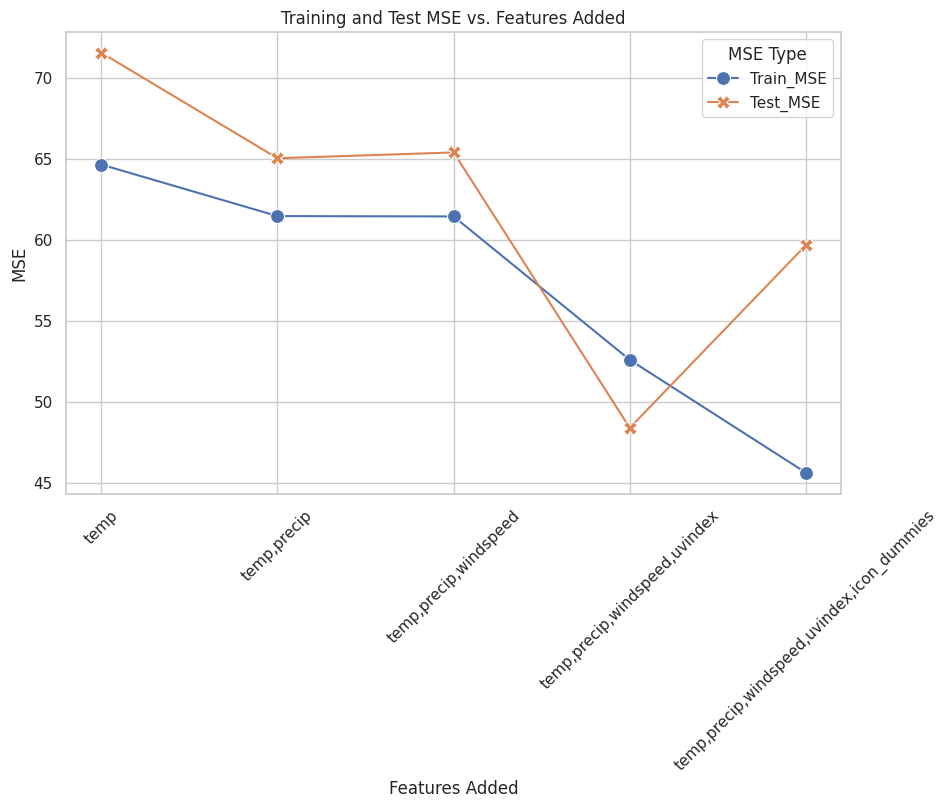

In [174]:
# Plotting the train and test MSE values
plt.figure(figsize=(10, 6))
sns.lineplot(data=mse_long, x='Features', y='MSE', hue='MSE_Type', style='MSE_Type',
             markers=True, markersize=10, dashes=False)

# Customize the plot
plt.xlabel('Features Added')
plt.ylabel('MSE')
plt.title('Training and Test MSE vs. Features Added')
plt.legend(title='MSE Type')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

## Task 7: Based on the above plot, identify the best combination of features for PU_ct prediction in linear regression. [10 pts]

Talculated MSE's and the plot show that the best combination of features for predicting PU_ct in linear regression is:
**temp, precip, windspeed and uvindex**.

Why?
* This combination has the lowest test MSE (48.386922).
* The training and test MSE are also very close, which shows that the model can be used as a good general model for data new data.
* Also, when we addi more features after that (e.g., icon_dummies) this will result in overfitting, which is evident from the increase in test MSE.

## Task 8: Conduct Task 1-7 again for DO_ct prediction. [30 pts]

**Task 1: Train a linear regression model with a single feature ('temp') for DO_ct, and report the training and test MSE, respectively.**

**Task 2: Train a linear regression model with two feature ('temp' and 'precip') for PU_ct, and report the training and test MSE, respectively.**

**Task 3: Train a linear regression model with features ('temp','precip','windspeed') for PU_ct, and report the training and test MSE, respectively.**

**Task 4: Train a linear regression model with features ('temp','precip','windspeed','uvindex') for PU_ct, and report the training and test MSE, respectively.**

**Task 5: Train a linear regression model with features ('temp','precip','windspeed','uvindex','icon') for PU_ct, and report the training and test MSE, respectively.**

**Task 6: Based on the previous results, plot the changes in training and test MSEs as more features are added to the linear regression model.**

**Task 7: Based on the above plot, identify the best combination of features for PU_ct prediction in linear regression.**

#Reference
##### <font color="red">"DeepSeek AI (Version 1.0, developed by DeepSeek AI, accessed January 28, 2025)" was consulted during the research process.</font>
